## M345SC 2019 Lab 3

### Task 1: Barabasi-Albert network

The Barabasi-Albert model for complex networks is based on the idea that networks evolve over time and that new nodes are more likely to link to high-degree nodes. It is (probably) the single-most important model in the field of network science as it reproduces several important qualitative features seen in large complex real-world networks.
In this task, you will use NetworkX to generate B-A networks and investigate their properties.

1) The B-A model requires two input parameters: the total number of nodes (*N*), and the number of links, *L*,  added between a new node and the existing network upon its introduction. Use the function *nx.barabasi_albert_graph* to generate a B-A graph with *N=500* and *L=4*. Draw your graph (with node_size=6) and zoom into the figure and look around -- do you see any hubs?

Populating the interactive namespace from numpy and matplotlib


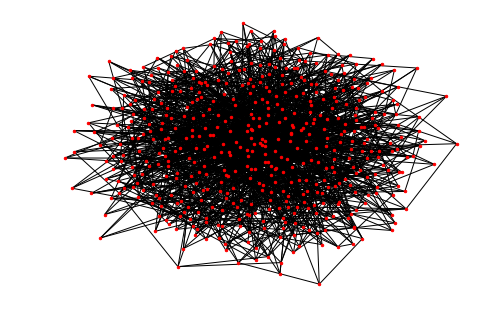

In [3]:
import networkx as nx
%pylab inline

N = 500
L = 4
G = nx.barabasi_albert_graph(N, L)
figure()
nx.draw(G,node_size=6)

2) Now, generate a B-A graph with *N=5000*, *L=4*, and an Erdos-Renyi (GNP) graph with *N=5000* and *P=0.002*.
Compute the degree distributions for these graphs and plot them on a log-log plot.

In [7]:
#Add code here
BArandom = nx.barabasi_albert_graph(5000, 4)
# GNP
Grandom = nx.gnp_random_graph(5000,0.002)

In [8]:
def plot_degree_distribution(graph): 
    degs = {}
    for n in graph.nodes():
        deg = graph.degree(n) 
        if deg not in degs:
            degs[deg] = 0 
        degs[deg] += 1
    return degs

Text(0.5,1,'BA Degree Distribution')

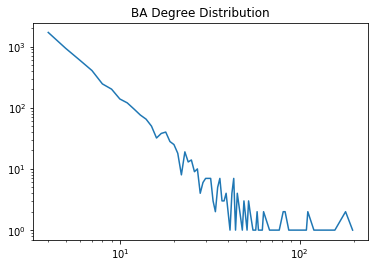

In [9]:
degs = plot_degree_distribution(BArandom)
items = sorted(degs.items())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("BA Degree Distribution")

In [12]:
degs = plot_degree_distribution(Grandom)
items = sorted(degs.items())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
ax.set_xscale('log') 
ax.set_yscale('log')
plt.title("GNP Degree Distribution")

Text(0.5,1,'GNP Degree Distribution')

3) The global clustering coefficient, *C*, is the average of the clustering coefficients of each node in a network and can be computed with *nx.cluster.average_clustering*. Compute and compare *C* for the E-R and B-A graphs (see the lecture 6 slides for the definition of *C*).

In [13]:
BA_clust = nx.cluster.average_clustering(BArandom)
ER_clust = nx.cluster.average_clustering(Grandom)

print("The global clustering coefficient of B-A graph is", BA_clust, "\n")
print("The global clustering coefficient of B-A graph is", ER_clust, "\n")

The global clustering coefficient of B-A graph is 0.010916330853602186 

The global clustering coefficient of B-A graph is 0.0018500294133111492 



### Task 2: String matching efficiency

Our simple pattern-search algorithm utilizes a character-by-character comparison of the pattern with sub-strings in the larger genetic sequence:

In [ ]:
infile = open('test_sequence.txt','r')
S = infile.read() #(long) gene sequence
infile.close()
P = 'TCGATCGGAAGT' #example pattern

imatch=[] #list of match locations
n,m=len(S),len(P)

#Iterate through data
for ind in range(0,n-m+1):
    if ind%100000==0: print("ind=",ind)
    match=True
    for j in range(m): #character-by-character comparison
        if P[j] != S[ind+j]:
            match=False
            break
    if match:
        print("match found!, ind=",ind)
        imatch.append(ind)
            

In Python, it is possible to directly compare strings. For example, given two strings, S1 and S2, we can simply check if S1==S2. We don't know (without doing a little research) the algorithm Python uses for this comparison or if it will be better than the approach used in our pattern search code.

1) How does the use of direct string comparison affect the speed of the pattern search code?

In [ ]:
def psearch1(S,P):
    imatch=[] #list of match locations
    n,m=len(S),len(P)

    #Iterate through data
    for ind in range(0,n-m+1):
        match=True
        for j in range(m): #character-by-character comparison
            if P[j] != S[ind+j]:
                match=False
                break
        if match:
            print("match found!, ind=",ind)
            imatch.append(ind)
    return imatch

#Add code here

In [ ]:
def psearch2(S,P):
    imatch=[] #list of match locations
    n,m=len(S),len(P)

    #Iterate through data
    for ind in range(0,n-m+1):
        match= P==S[ind:(ind+m)]
        if match:
            print("match found!, ind=",ind)
            imatch.append(ind)
    return imatch

#Add code here

In [ ]:
timeit psearch1(S,P)

In [ ]:
timeit psearch2(S,P)

The direct comparison actually runs slower than our one-to-one character match

2) Use numerical tests to construct an estimate of the asymptotic running time of direct string comparison. How does it compare to character-by-character comparison?

In [ ]:
#add code here

